<a href="https://colab.research.google.com/github/lorransr/mk_analysis/blob/master/MK_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uma analise da franquia Mortal Kombat

## Desde pequeno, sempre escolhi o Sub-Zero ♪

Mortal Kombat é uma daquelas franquias que mexe com a gente. Quem viveu a era do fliperama lembra como era o alvoroço com o game. Mortal Kombat era violento, divertido e acima de tudo desafiador. Eu sempre fui pessimo, na verdade, eu era basicamente uma fase bonus no fliperama. Mas nunca perdi o encanto com jogo. 

Foi pensando nessa nostalgia e no lançamento do novo Mortal Kombat 11, que chega as lojas no dia 23 de abril. Decidi entender um pouco mais da franquia. São quantos jogos afinal? Quais são os melhores? Será que só eu adoro o MK Shaolin Monks? Existe consenso entre os fãs e os críticos? Essas são as perguntas que pretendo responder com essa análise.


---

Meu ponto de partida foi conseguir os dados. A IGDB, é uma comunidade que junta toda a informação relevante de games em apenas um lugar. Eles tentam ser uma espécie de ponte entre desenvolvedores e jogadores ao redor do mundo. O mais impressionante é a API que eles disponibilizam com informação de mais de **197820** jogos. Com a API deles eu consegui informação de todos os jogos que pudessem ter "Kombat" no título, transformei tudo em um CSV que está disponível no meu GitHub.

In [31]:
!pip install seaborn==0.9.0

Importando as libs. Essa será uma analise puramente exploratória então nada de scikit learn e outras bibliotecas voltadas para o aprendizado de maquina

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#importando os dados
raw = pd.read_csv('https://raw.githubusercontent.com/lorransr/mk_analysis/master/mk.csv')
raw.head()

,id,aggregated_rating,aggregated_rating_count,category,first_release_date,name,platforms/0,platforms/1,platforms/2,popularity,...,total_rating_count,platforms/3,platforms/4,platforms/5,platforms/6,platforms/7,platforms/8,platforms/9,platforms/10,hypes
0,119,84.833333,9.0,0,1.303171e+09,Mortal Kombat,9.0,12.0,46.0,6.272077,...,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,81899,NaN,NaN,0,NaN,Mortal Kombat & Mortal Kombat II,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16130,NaN,NaN,1,1.429142e+09,Mortal Kombat X - Kombat Pack,6.0,12.0,48.0,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16131,NaN,NaN,1,NaN,Mortal Kombat X - Kombat Pack 2,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1612,70.000000,3.0,0,1.037405e+09,Mortal Kombat: Deadly Alliance,8.0,11.0,21.0,1.842424,...,30.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
raw.columns

Index(['id', 'aggregated_rating', 'aggregated_rating_count', 'category',
       'first_release_date', 'name', 'platforms/0', 'platforms/1',
       'platforms/2', 'popularity', 'rating', 'rating_count',
       'total_rating_count', 'platforms/3', 'platforms/4', 'platforms/5',
       'platforms/6', 'platforms/7', 'platforms/8', 'platforms/9',
       'platforms/10', 'hypes'],
      dtype='object')

In [35]:
raw.shape

(48, 22)

A tabela em questão contêm 22 colunas e 48 linhas. As Colunas são:
* ID --> Identificador do jogo
* Agg_rating --> Avaliação da crítica especializada acumulada
* Agg_rating_count --> Contagem do número de avalizações da crítica especializada
* category --> categoria do jogo (0-jogo principal,1-dlc,2-expansão,3-Bundle,4-expansão standalone)
* first_release_date --> data do lançamento (unix)
* name --> nome do jogo
* platforms/0,1,2,3,4,5,6,7,8,9 --> Codigo da plataforma que o jogo foi lançado
* hypes --> Quantidade de seguidas que o jogo ganhou no site antes do lançamento

In [0]:
#modificando o nome das colunas
raw.columns = ['id','agg_rating',"agg_rating_count",
               "category","release","name","plat0","plat1",
               "plat2","popularity","rating","rating_count",
               "total_rating_count","plat3",
               "plat4","plat5","plat6","plat7","plat8",
               "plat9","plat10","hypes"]

In [0]:
#ordenando colunas
raw = raw.reindex(sorted(raw.columns), axis=1)

In [38]:
#criando uma lista com os valores unicos de cada coluna plat
choose_columns = ["plat0","plat1","plat2",
                  "plat3","plat4","plat5",
                  "plat6","plat7","plat8",
                  "plat9","plat10"]
lista = []
for i in choose_columns:
  lista.append(raw[i].unique())

#tomando um array com apenas os valores que não se repetem nas listas
np.unique(np.concatenate(lista))


array([  4.,   5.,   6.,   7.,   8.,   9.,  11.,  12.,  13.,  16.,  19.,
        21.,  22.,  23.,  24.,  29.,  30.,  32.,  33.,  34.,  35.,  36.,
        38.,  39.,  45.,  46.,  48.,  49.,  52.,  64.,  78.,  79.,  80.,
       130., 136.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan])

usei essa lista gerada para puxar da API do IGDB uma tabela contendo os nomes das plataformas. Peguei o resultado, transformei em um CSV e também disponibilizei ele no meu GitHub

In [39]:
platf = pd.read_csv('https://raw.githubusercontent.com/lorransr/mk_analysis/master/platforms.csv')
platf.columns=["plat0","platform_name"]
platf.head()

,plat0,platform_name
0,3,Linux
1,6,PC (Microsoft Windows)
2,7,PlayStation
3,8,PlayStation 2
4,9,PlayStation 3


Para substituir os id's das plataformas pelos nomes respectivos, eu optei por criar um dicionário e em seguida mapea-lo na coluna

In [40]:
#Criei um dicionário transformando a coluna plat0 no id,
#em seguida transpondo a tabela e transformando-a em um dicionário
platf_dict=platf.set_index('plat0').T.to_dict('list')
platf_dict

{3: ['Linux'],
 4: ['Nintendo 64'],
 6: ['PC (Microsoft Windows)'],
 7: ['PlayStation'],
 8: ['PlayStation 2'],
 9: ['PlayStation 3'],
 11: ['Xbox'],
 12: ['Xbox 360'],
 14: ['Mac'],
 15: ['Commodore C64/128'],
 19: ['Super Nintendo Entertainment System (SNES)'],
 25: ['Amstrad CPC'],
 27: ['MSX'],
 38: ['PlayStation Portable'],
 39: ['iOS'],
 44: ['Tapwave Zodiac'],
 48: ['PlayStation 4'],
 51: ['Family Computer Disk System'],
 52: ['arcade'],
 64: ['Sega Master System'],
 67: ['Intellivision'],
 68: ['ColecoVision'],
 71: ['Commodore VIC-20'],
 72: ['Ouya'],
 74: ['Windows Phone'],
 75: ['Apple II'],
 80: ['Neo Geo AES'],
 88: ['Odyssey'],
 90: ['Commodore PET'],
 91: ['Bally Astrocade'],
 94: ['Commodore Plus/4'],
 96: ['PDP-10'],
 97: ['PDP-8'],
 115: ['Apple IIGS'],
 118: ['FM Towns'],
 120: ['Neo Geo Pocket Color'],
 123: ['WonderSwan Color'],
 126: ['TRS-80'],
 128: ['PC Engine SuperGrafx'],
 129: ['Texas Instruments TI-99'],
 133: ['Philips Videopac G7000'],
 134: ['Acorn Elect

In [0]:
#criando o df que será usado na análise
df = raw

In [0]:
#mapeando o dicionário a cada coluna
for i in choose_columns:
  df[i]=df[i].map(platf_dict)

In [43]:
#criando uma coluna que agrega todas as plataformas
#df[choose_columns]=df[choose_columns].astype(str)
df["platforms"]=df[choose_columns].values.tolist()
df["platforms"] = df["platforms"].apply(lambda x: [i for i in x if str(i) != "nan"])
df.head()

,agg_rating,agg_rating_count,category,hypes,id,name,plat0,plat1,plat10,plat2,...,plat6,plat7,plat8,plat9,popularity,rating,rating_count,release,total_rating_count,platforms
0,84.833333,9.0,0,NaN,119,Mortal Kombat,[PlayStation 3],[Xbox 360],NaN,NaN,...,NaN,NaN,NaN,NaN,6.272077,83.940729,139.0,1.303171e+09,148.0,"[[PlayStation 3], [Xbox 360]]"
1,NaN,NaN,0,NaN,81899,Mortal Kombat & Mortal Kombat II,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,[]
2,NaN,NaN,1,NaN,16130,Mortal Kombat X - Kombat Pack,[PC (Microsoft Windows)],[Xbox 360],NaN,[PlayStation 4],...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.429142e+09,NaN,"[[PC (Microsoft Windows)], [Xbox 360], [PlaySt..."
3,NaN,NaN,1,NaN,16131,Mortal Kombat X - Kombat Pack 2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,[]
4,70.000000,3.0,0,NaN,1612,Mortal Kombat: Deadly Alliance,[PlayStation 2],[Xbox],NaN,NaN,...,NaN,NaN,NaN,NaN,1.842424,62.258517,27.0,1.037405e+09,30.0,"[[PlayStation 2], [Xbox]]"


In [0]:
#removendo os jogos que não são jogos principais
df = df[df["category"]==0]

In [45]:
df.name.unique()

array(['Mortal Kombat', 'Mortal Kombat & Mortal Kombat II',
       'Mortal Kombat: Deadly Alliance', 'Mortal Kombat II',
       'Mortal Kombat: Deception', 'Mortal Kombat: Unchained',
       'Kombat Kars', 'Pong Kombat', 'Mental Kombat', 'Science Kombat',
       'Kigurumi Kombat', 'Mortal Kombat 3', 'Mortal Kombat 4',
       'Mortal Kombat 11', 'Mortal Kombat X', 'Mortal Kombat Gold',
       'Mortal Kombat Advance', 'Mortal Kombat Trilogy',
       'Mortal Kombat X Mobile', 'Mortal Kombat Kollection',
       'Mortal Kombat II Special', 'Mortal Kombat: Armageddon',
       'Ultimate Mortal Kombat 3', 'Aggressors of Dark Kombat',
       'Mortal Kombat II Unlimited', 'Mortal Kombat Revelations',
       'Mortal Kombat: Shaolin Monks', 'Mortal Kombat: Special Forces',
       'Mortal Kombat vs. DC Universe', 'Ultimate Mortal Kombat Trilogy',
       'Mortal Kombat X Premium Edition',
       'Mortal Kombat HD Arcade Kollection',
       'Mortal Kombat: Tournament Edition',
       'Mortal Kombat M

Esses são todos os jogos de Mortal Kombat que serão analisados. Mas tem uma coisa estranha...
Agressors of Dark Kombat???

Esse eu também não conhecia, Agressors of Dark Kombat é um game da SNK, de luta que foi lançado pro fliperama em 1994. A grande inovação do jogo em relação aos outros do genero era quem em ADK você podia se movimentar pra dentro e fora da tela, imitando a logica de jogos consagrados como streets of rage e colocando ela em um jogo de luta.

Aparentemente não foi bem recebido e ADK ganhou o prémio de jogo **mais estranho** do ano pela EGM

In [0]:
#removendo essa reliquia
df = df[df["name"] != "Agressors of Dark Kombat"]

In [0]:
#removendo os jogos que não foram avaliados
df.dropna(subset=["rating"],inplace=True)

In [48]:
#todos os jogos
df.groupby("name")[["name"]].count()

,name
name,
Mortal Kombat,2
Mortal Kombat 3,1
Mortal Kombat 4,1
Mortal Kombat II,1
Mortal Kombat Mythologies: Sub-Zero,1
Mortal Kombat Trilogy,1
Mortal Kombat X,1
Mortal Kombat vs. DC Universe,1
Mortal Kombat: Armageddon,1


Aparentemente existem dois titulos da franquia com o nome de Mortal Kombat

In [50]:
df[df["name"]=="Mortal Kombat"]

,agg_rating,agg_rating_count,category,hypes,id,name,plat0,plat1,plat10,plat2,...,plat6,plat7,plat8,plat9,popularity,rating,rating_count,release,total_rating_count,platforms
0,84.833333,9.0,0,NaN,119,Mortal Kombat,[PlayStation 3],[Xbox 360],NaN,NaN,...,NaN,NaN,NaN,NaN,6.272077,83.940729,139.0,2011-04-19,148.0,"[[PlayStation 3], [Xbox 360]]"
11,83.333333,0.0,0,NaN,1618,Mortal Kombat,NaN,NaN,NaN,[Super Nintendo Entertainment System (SNES)],...,[arcade],[Sega Master System],NaN,NaN,4.796396,66.468611,104.0,1992-08-02,104.0,"[[Super Nintendo Entertainment System (SNES)],..."


In [0]:
df.loc[11,"name"] = "Mortal Kombat(1992)"

Isso acontece porque o titulo de 2011 foi lançado com o mesmo nome do Mortal Kombat clássico do super nintendo. Na verdade o Mortal Kombat (2011) É conhecido popularmente como Mortal Kombat 9. Embora o titulo se chamar apenas Mortal Kombat têm tudo a ver com enredo. Acontece que MK 9 acontece após os eventos de MK Armageddom, porém Raidem, o Deus do trovão, consegue voltar no tempo e reviver os eventos de Mortal Kombat 1,2 e 3. Os eventos são alterados, criando a nova linha do tempo da série.

Por fim,falta corrigir as datas que estão em Unix.


In [0]:
import datetime
df["release"]=df["release"].apply(lambda x: datetime.datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d'))

In [0]:
#Dropando as colunas de plataformas
df.drop(choose_columns,inplace=True, axis=1)

In [0]:
#Dropando a colunas que não serão utilizadas
df.drop(["hypes","category","id"], axis = 1, inplace = True)

## MORTAL KOMBAT!

In [54]:
df.describe()

,agg_rating,agg_rating_count,popularity,rating,rating_count,total_rating_count
count,11.000000,11.000000,15.000000,15.000000,15.000000,15.000000
mean,71.290765,5.090909,3.038600,71.415818,57.266667,61.000000
std,12.606922,6.090231,2.091651,9.113487,45.362771,48.615106
min,50.000000,0.000000,1.000000,52.878125,6.000000,6.000000
25%,65.000000,1.000000,1.631209,64.363564,27.000000,31.000000
50%,74.000000,3.000000,2.469980,71.217500,36.000000,40.000000
75%,80.238095,6.500000,3.423478,78.196421,82.500000,83.000000
max,84.833333,21.000000,8.612915,83.940729,147.000000,168.000000


* Agregate rating nos fornece a avalização da crítica exterior
* Agg_rating_count fornece a quantidade de reviews que o jogo teve
* category apenas nos diz que o jogo é um jogo principal da séria
* id é o codigo de identificação do jogo na base de dados
* popularity é um número baseado no trafego que a pagina do jogo recebe
* rating é a crítica que o jogo recebeu dos fãs no site
* rating count é contagem de críticas no site por usuários
* total rating é o total de avaliações

### Segundo a Crítica

Text(0, 0.5, '')

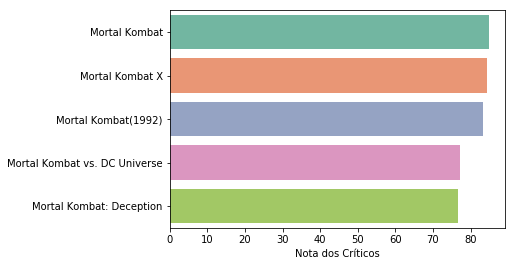

In [77]:
g =sns.barplot(data = df.sort_values("agg_rating",ascending=False).head(),
               x="agg_rating",
               y ="name",
               palette = "Set2")
g.set_xlabel("Nota dos Críticos")
g.set_ylabel("")

### Segundo os Jogadores

Text(0, 0.5, '')

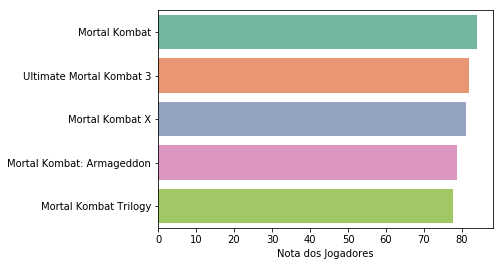

In [78]:
h = sns.barplot(data = df.sort_values("rating",ascending=False).head(),
                x="rating",
                y ="name",
                palette ="Set2")
h.set_xlabel("Nota dos Jogadores")
h.set_ylabel("")

Os gráficos são diferentes. Parece que existe um concenso cláro que MK 9 (ou apenas MK) é o melhor jogo da série, mas os outros parecem dividir um pouco as opniões

Text(0, 0.5, 'Nota da Crítica')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


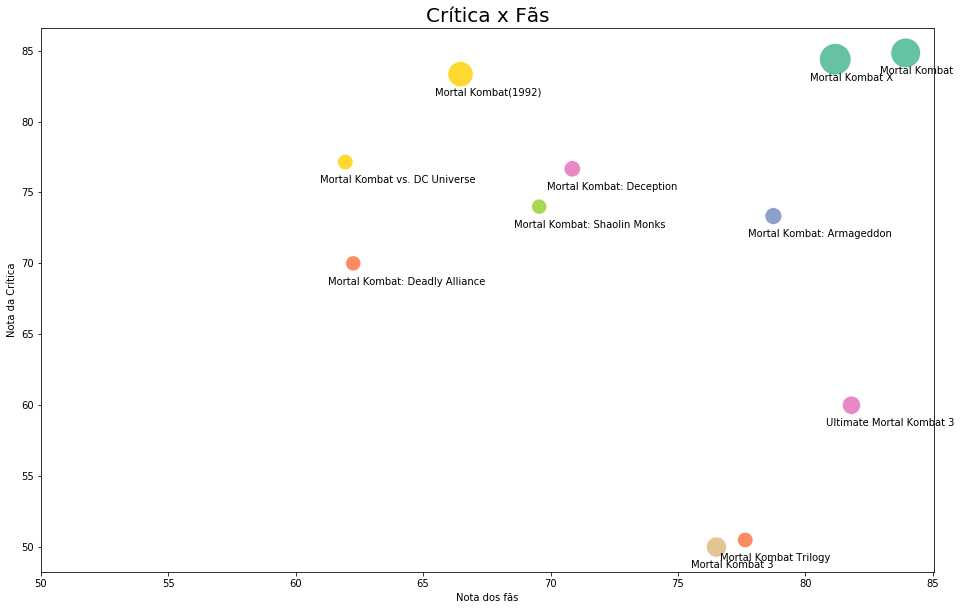

In [79]:
%matplotlib inline

plt.figure(figsize=(16,10))
g = sns.scatterplot(x ="rating",
                    y = "agg_rating",
                    data = df,
                    hue="name",
                    size="total_rating_count",
                    palette = "Set2",
                    sizes=(100, 1000));

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']-1, point['y']-1.5, str(point['val']))

label_point(df.rating, df.agg_rating, df.name, plt.gca());

g.get_legend().remove();
g.set_title("Crítica x Fãs",fontsize=20)
g.set_xlim(left = 50)
g.set_xlabel("Nota dos fãs")
g.set_ylabel("Nota da Crítica")

Esse gráfico mostra a avaliação da crítica, em relação a avaliação dos fãs. MK 9 e MK X são bastante queridos por ambos. É engraçado observar que MK de 1992 é um dos jogos favoritos da crítica, e que MK 3 é queridissimo pelos fãs e nem tanto pela crítica (a historia para as suas melhoria, MK Trilogy e Ultimate MK3 é parecida). 

In [75]:
for i in 
df.platforms.values

15